In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import random
import matplotlib.image as mpimg
from imutils import paths
import sys
import operator

In [3]:
!pip install rich
!pip install hydra-core
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.3 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 5.8 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 117 kB 55.1 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=002ab027f17b94cde9d8f2a3bcf4f118905131fa38ca9d8e9306dc40c54d3eab
  Stored in directory: /root/.cache/pip/wheels/8b/8d/53/2af8772d9aec614e3fc65e53d4a993ad73c61daa8bbd85a873
Successfully built antlr4-python3-runtime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 705 kB 5.1 MB/s 
     |████████████████████████████████| 5.9 MB 59.2 MB/s 
     |████████████████████████████████| 419 kB 55.6 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.0 which is incompatible.


In [4]:
sys.path.insert(0, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation")
sys.path.insert(1, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation/src/utils")

In [5]:
import pytorch_lightning as pl
from src.utils.display_image_from_path import img_show
from src.utils.display_image_from_array import img_show_from_arr

In [6]:
img = cv2.imread("/content/drive/MyDrive/Images/image.png")
img_mask = cv2.imread("/content/drive/MyDrive/output/test_page_predicted_masks/osmanlica_test_mask_100x100.png")

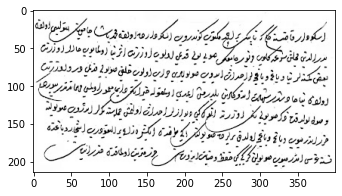

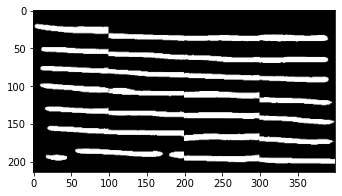

In [7]:
img_show_from_arr(img)
img_show_from_arr(img_mask)

In [8]:
def next_neighbor_as_zero(height, width, mask):

  pixels_having_0_as_neighbor = []

  for i in range(3, height-3):
    for j in range(3, width-3):
      if mask[i][j][0] == 255:
        if mask[i-3][j][0] == 0: # downstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j-3][0] == 0: # left neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i+3][j][0] == 0: # upstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j+3][0] == 0: # right neighbor
          pixels_having_0_as_neighbor.append((i, j))
  return pixels_having_0_as_neighbor

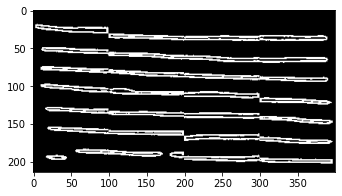

In [9]:
height, width, depth = img.shape
next_neighbor0_coords = next_neighbor_as_zero(height, width, img_mask)
next_neighbor0_mask = np.zeros(img.shape)

for coord in next_neighbor0_coords:
  next_neighbor0_mask[coord[0]][coord[1]][0] = 255
  next_neighbor0_mask[coord[0]][coord[1]][1] = 255
  next_neighbor0_mask[coord[0]][coord[1]][2] = 255

img_show_from_arr(next_neighbor0_mask)

In [10]:
def frequency_of_ones(window):
  unique, counts = np.unique(window, return_counts=True)
  x = np.asarray((unique, counts)).T

  if len(x) == 1:
    if x[0][0] == 0:
      return 0
    else:
      return x[0][1]
  else:
    return x[1][1]

In [11]:
lines_mask = next_neighbor0_mask.copy()

for i in range(2, height-2):
  for j in range(4, width-4):
    rows = next_neighbor0_mask[i-2:i+2, j, :]
    cols = next_neighbor0_mask[i, j-4:j+4, :]
    rows_ones_neighbor = frequency_of_ones(rows)
    cols_ones_neighbor = frequency_of_ones(cols)
    if rows_ones_neighbor > 0 and cols_ones_neighbor > 0:
      lines_mask[i][j][0] = 255
      lines_mask[i][j][1] = 255
      lines_mask[i][j][2] = 255

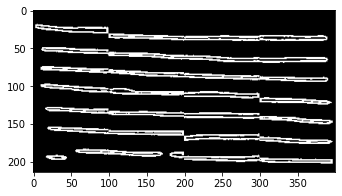

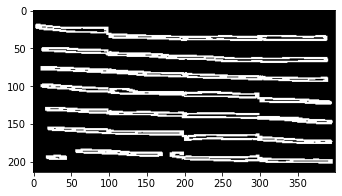

In [12]:
img_show_from_arr(next_neighbor0_mask)
img_show_from_arr(lines_mask)

In [13]:
lines_mask_v2 = lines_mask.copy()

for i in range(2, height-2):
  for j in range(4, width-4):
    rows = lines_mask[i-2:i+2, j, :]
    cols = lines_mask[i, j-4:j+4, :]
    rows_ones_neighbor = frequency_of_ones(rows)
    cols_ones_neighbor = frequency_of_ones(cols)
    if rows_ones_neighbor > 0 and cols_ones_neighbor > 0:
      lines_mask_v2[i][j][0] = 255
      lines_mask_v2[i][j][1] = 255
      lines_mask_v2[i][j][2] = 255

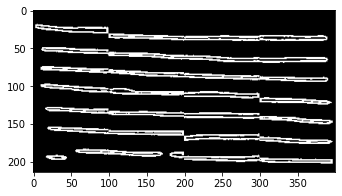

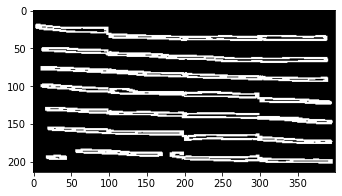

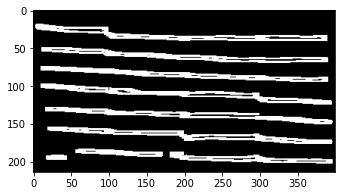

In [14]:
img_show_from_arr(next_neighbor0_mask)
img_show_from_arr(lines_mask)
img_show_from_arr(lines_mask_v2)

In [15]:
lines_mask_v3 = lines_mask_v2.copy()

for i in range(3, height-3):
  for j in range(5, width-5):
    rows = lines_mask_v2[i-3:i+3, j, :]
    cols = lines_mask_v2[i, j-5:j+5, :]
    rows_ones_neighbor = frequency_of_ones(rows)
    cols_ones_neighbor = frequency_of_ones(cols)
    if rows_ones_neighbor > 0 and cols_ones_neighbor > 0:
      lines_mask_v3[i][j][0] = 255
      lines_mask_v3[i][j][1] = 255
      lines_mask_v3[i][j][2] = 255

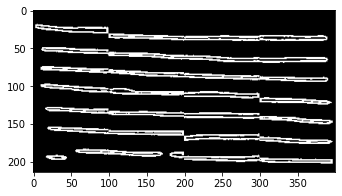

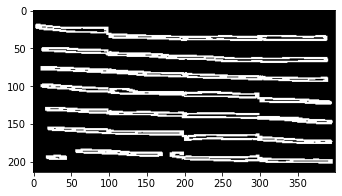

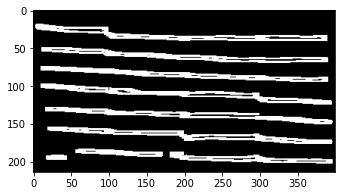

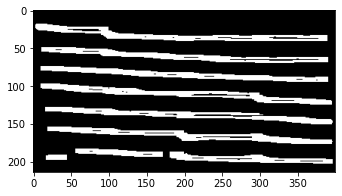

In [16]:
img_show_from_arr(next_neighbor0_mask)
img_show_from_arr(lines_mask)
img_show_from_arr(lines_mask_v2)
img_show_from_arr(lines_mask_v3)

In [17]:
lines_mask_v4 = lines_mask_v3.copy()

for i in range(int(height*0.1), int(height*0.9)):
  for j in range(int(width*0.1), int(width*0.9)):
    cols = lines_mask_v3[i, j-15:j+15, :]
    if frequency_of_ones(cols) > 0:
      lines_mask_v4[i][j][0] = 255
      lines_mask_v4[i][j][1] = 255
      lines_mask_v4[i][j][2] = 255
    

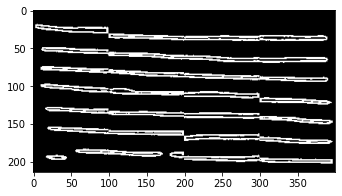

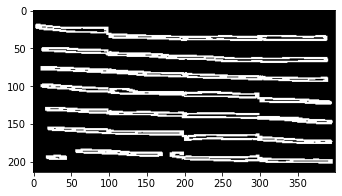

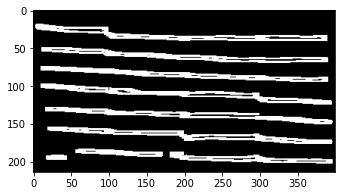

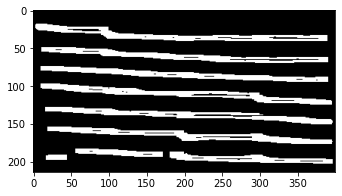

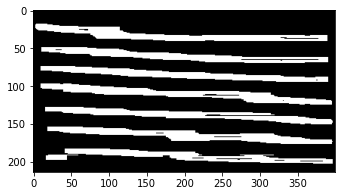

In [18]:
img_show_from_arr(next_neighbor0_mask)
img_show_from_arr(lines_mask)
img_show_from_arr(lines_mask_v2)
img_show_from_arr(lines_mask_v3)
img_show_from_arr(lines_mask_v4)

In [19]:
lines_mask_v5 = lines_mask_v4.copy()

for i in range(int(height*0.1), int(height*0.9)):
  for j in range(int(width*0.1), int(width*0.9)):
    rows = lines_mask_v4[i-3:i+3, j, :]
    if frequency_of_ones(rows) > 0:
      lines_mask_v5[i][j][0] = 255
      lines_mask_v5[i][j][1] = 255
      lines_mask_v5[i][j][2] = 255

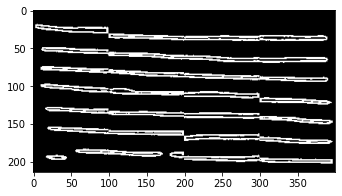

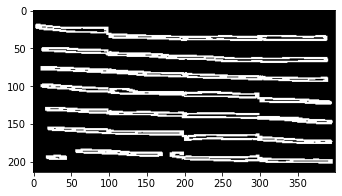

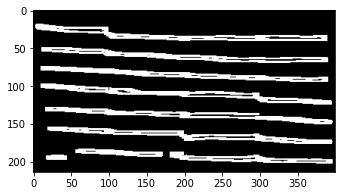

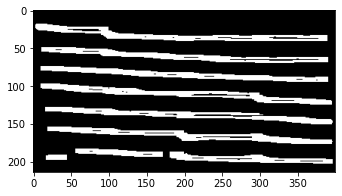

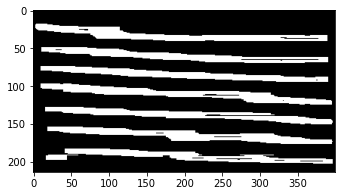

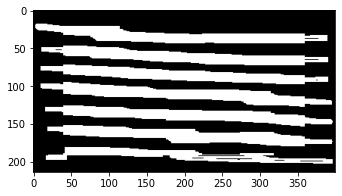

In [20]:
img_show_from_arr(next_neighbor0_mask)
img_show_from_arr(lines_mask)
img_show_from_arr(lines_mask_v2)
img_show_from_arr(lines_mask_v3)
img_show_from_arr(lines_mask_v4)
img_show_from_arr(lines_mask_v5)

In [21]:
lines_mask_v5[22][:50]

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
 

In [22]:
lines_mask_v6 = lines_mask_v5.copy()
for i in range(height):
  for j in range(width):
    if lines_mask_v5[i][j][0] > 0:
      lines_mask_v6[i][j][0] = 1 
      lines_mask_v6[i][j][1] = 1
      lines_mask_v6[i][j][2] = 1

In [23]:
lines_mask_v6[22][:50]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1

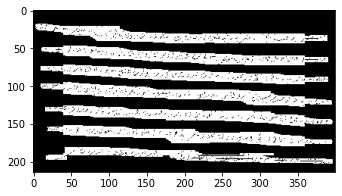

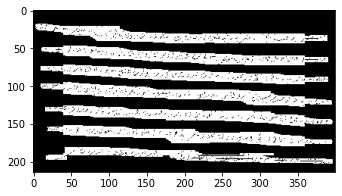

In [24]:
img_show_from_arr(lines_mask_v5 * img)
img_show_from_arr(lines_mask_v6 * img)

In [27]:
lines_mask_v7 = lines_mask_v6.copy()

for i in range(height):
  for j in range(width):
    lines_mask_v7[i][j][0] = 1 
    lines_mask_v7[i][j][1] = 1
    lines_mask_v7[i][j][2] = 1

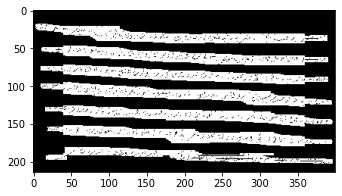

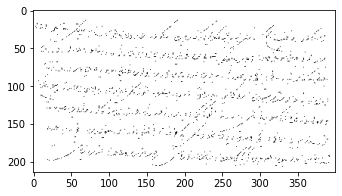

In [28]:
img_show_from_arr(lines_mask_v6 * img)
img_show_from_arr(lines_mask_v7 * img)

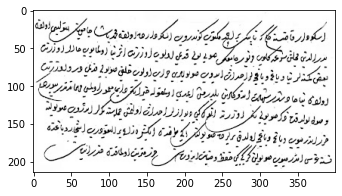

In [29]:
img_show_from_arr(img)

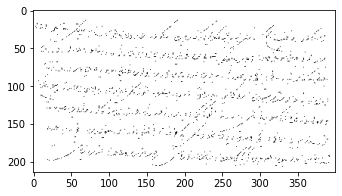

In [30]:
img_from_mask = img * lines_mask_v7
img_show_from_arr(img_from_mask)

In [31]:
img_from_mask[0][:50]

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
 

In [32]:
img[11][:50]

array([[255, 255, 255],
       [255, 255, 255],
       [253, 253, 253],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [250, 250, 250],
       [255, 255, 255],
       [251, 251, 251],
       [255, 255, 255],
       [248, 248, 248],
       [255, 255, 255],
       [251, 251, 251],
       [252, 252, 252],
       [255, 255, 255],
       [252, 252, 252],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [251, 251, 251],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [253, 253, 253],
       [250, 250, 250],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [252, 252, 252],
       [255, 255

In [33]:
img2 = img.copy()

for i in range(height):
  for j in range(width):
    for k in range(depth):
      if img2[i][j][k] > 0:
         img2[i][j][k] = 255


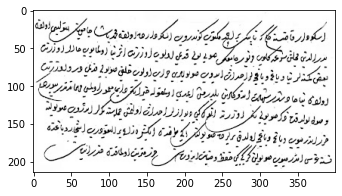

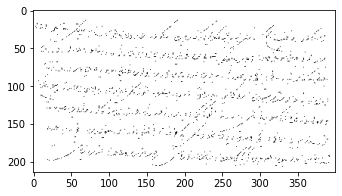

In [34]:
img_show_from_arr(img)
img_show_from_arr(img2)

In [35]:
img3 = img.copy()

for i in range(height):
  for j in range(width):
    for k in range(depth):
      if img2[i][j][k] > 127:
        img2[i][j][k] = 255
      else:
        img2[i][j][k] = 0

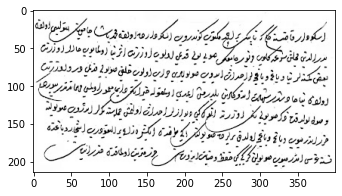

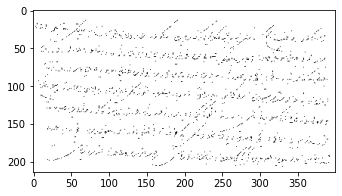

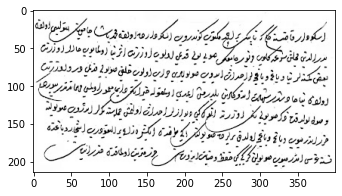

In [36]:
img_show_from_arr(img)
img_show_from_arr(img2)
img_show_from_arr(img3)

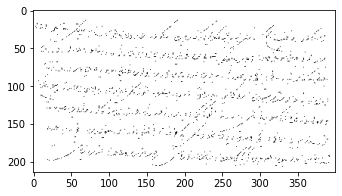

In [37]:
img_show_from_arr(img * np.ones(img.shape))

In [38]:
img_times_ones = img * np.ones(img.shape)

In [39]:
img_times_ones[11][:75]

array([[255., 255., 255.],
       [255., 255., 255.],
       [253., 253., 253.],
       [255., 255., 255.],
       [254., 254., 254.],
       [255., 255., 255.],
       [250., 250., 250.],
       [255., 255., 255.],
       [251., 251., 251.],
       [255., 255., 255.],
       [248., 248., 248.],
       [255., 255., 255.],
       [251., 251., 251.],
       [252., 252., 252.],
       [255., 255., 255.],
       [252., 252., 252.],
       [254., 254., 254.],
       [255., 255., 255.],
       [255., 255., 255.],
       [251., 251., 251.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [254., 254., 254.],
       [255., 255., 255.],
       [253., 253., 253.],
       [250., 250., 250.],
 

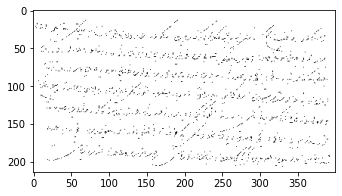

In [40]:
img_show_from_arr(img_times_ones)

In [41]:
img[11][:75]

array([[255, 255, 255],
       [255, 255, 255],
       [253, 253, 253],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [250, 250, 250],
       [255, 255, 255],
       [251, 251, 251],
       [255, 255, 255],
       [248, 248, 248],
       [255, 255, 255],
       [251, 251, 251],
       [252, 252, 252],
       [255, 255, 255],
       [252, 252, 252],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [251, 251, 251],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [253, 253, 253],
       [250, 250, 250],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [252, 252, 252],
       [255, 255

In [42]:
img7_path = "/content/7.png"
img7_mask_path = "/content/drive/MyDrive/output/test_page_predicted_masks/page7_predicted_mask_from_320x320_patches.png"
img7 = cv2.imread(img7_path)
img7 = cv2.resize(img7, (img7_mask.shape[1], img7_mask.shape[0]))
img7_mask = cv2.imread(img7_mask_path)
img7_times_ones = img7 * np.ones(img7.shape)
img7_times_mask = img7 * img7_mask

NameError: ignored

In [43]:
img_show_from_arr(img7_times_ones)

NameError: ignored

In [ ]:
img_show_from_arr(img7)
img_show_from_arr(img7_times_ones)
img_show_from_arr(img7_times_mask)